https://www.datacamp.com/statement-of-accomplishment/course/c754e6c65028f385b9b65c48e9a5a00f34e786e1

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
sales = pd.read_csv('sales_subset.csv')

# Print the head of the sales DataFrame
sales.head()

,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


In [9]:
# Print the info about the sales DataFrame
print(sales.info())

# Print the mean of weekly_sales
print(sales.weekly_sales.mean())

# Print the median of weekly_sales
print(sales.weekly_sales.median())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 10 columns):
Unnamed: 0              10774 non-null int64
store                   10774 non-null int64
type                    10774 non-null object
department              10774 non-null int64
date                    10774 non-null object
weekly_sales            10774 non-null float64
is_holiday              10774 non-null bool
temperature_c           10774 non-null float64
fuel_price_usd_per_l    10774 non-null float64
unemployment            10774 non-null float64
dtypes: bool(1), float64(4), int64(3), object(2)
memory usage: 768.1+ KB
None
23843.950148505668
12049.064999999999


In [10]:
# Print the maximum of the date column
print(sales.date.max())

# Print the minimum of the date column
print(sales.date.min())

2012-10-26
2010-02-05


#### The .agg() method allows you to apply your own custom functions to a DataFrame, as well as apply functions to more than one column of a DataFrame at once

In [41]:
# Import NumPy and create custom IQR function
import numpy as np
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# Update to print IQR and median of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg([iqr, np.median]))

        temperature_c  fuel_price_usd_per_l  unemployment
iqr         16.583333              0.073176         0.565
median      16.966667              0.743381         8.099


In [14]:
sales_1_1 = sales[(sales.department==1) & (sales.store==1)]
sales_1_1.head()

,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


In [15]:
# Sort sales_1_1 by date
sales_1_1 = sales_1_1.sort_values('date')

# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1_1['cum_weekly_sales'] = sales_1_1['weekly_sales'].cumsum()

# Get the cumulative max of weekly_sales, add as cum_max_sales col
sales_1_1['cum_max_sales'] = sales_1_1['weekly_sales'].cummax()

# See the columns you calculated
print(sales_1_1[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]])

          date  weekly_sales  cum_weekly_sales  cum_max_sales
0   2010-02-05      24924.50          24924.50       24924.50
1   2010-03-05      21827.90          46752.40       24924.50
2   2010-04-02      57258.43         104010.83       57258.43
3   2010-05-07      17413.94         121424.77       57258.43
4   2010-06-04      17558.09         138982.86       57258.43
5   2010-07-02      16333.14         155316.00       57258.43
6   2010-08-06      17508.41         172824.41       57258.43
7   2010-09-03      16241.78         189066.19       57258.43
8   2010-10-01      20094.19         209160.38       57258.43
9   2010-11-05      34238.88         243399.26       57258.43
10  2010-12-03      22517.56         265916.82       57258.43
11  2011-01-07      15984.24         281901.06       57258.43


In [37]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset=['store','type'])
store_types

,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
901,901,2,A,1,2010-02-05,35034.06,False,4.550000,0.679451,8.324
1798,1798,4,A,1,2010-02-05,38724.42,False,6.533333,0.686319,8.623
2699,2699,6,A,1,2010-02-05,25619.00,False,4.683333,0.679451,7.259
3593,3593,10,B,1,2010-02-05,40212.84,False,12.411111,0.782478,9.765
4495,4495,13,A,1,2010-02-05,46761.90,False,-0.261111,0.704283,8.316
5408,5408,14,A,1,2010-02-05,32842.31,False,-2.605556,0.735455,8.992
6293,6293,19,A,1,2010-02-05,21500.58,False,-6.133333,0.780365,8.350
7199,7199,20,A,1,2010-02-05,46021.21,False,-3.377778,0.735455,8.187
8109,8109,27,A,1,2010-02-05,32313.79,False,-2.672222,0.780365,8.237


In [21]:
# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset=['store','department'])
store_depts.head()

,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
12,12,1,A,2,2010-02-05,50605.27,False,5.727778,0.679451,8.106
24,24,1,A,3,2010-02-05,13740.12,False,5.727778,0.679451,8.106
36,36,1,A,4,2010-02-05,39954.04,False,5.727778,0.679451,8.106
48,48,1,A,5,2010-02-05,32229.38,False,5.727778,0.679451,8.106


In [22]:
# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = sales[sales['is_holiday']==True].drop_duplicates('date')

# Print date col of holiday_dates
display(holiday_dates)

,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
498,498,1,A,45,2010-09-10,11.47,True,25.938889,0.677602,7.787
691,691,1,A,77,2011-11-25,1431.00,True,15.633333,0.854861,7.866
2315,2315,4,A,47,2010-02-12,498.00,True,-1.755556,0.679715,8.623
6735,6735,19,A,39,2012-09-07,13.41,True,22.333333,1.076766,8.193
6810,6810,19,A,47,2010-12-31,-449.00,True,-1.861111,0.881278,8.067
6815,6815,19,A,47,2012-02-10,15.00,True,0.338889,1.010723,7.943
6820,6820,19,A,48,2011-09-09,197.00,True,20.155556,1.038197,7.806


In [35]:
# Count the number of stores of each type
store_counts = store_types['type'].value_counts()
print(store_counts)

# Get the proportion of stores of each type
store_props = store_types['type'].value_counts(normalize=True)
print(store_props)

A    11
B     1
Name: type, dtype: int64
A    0.916667
B    0.083333
Name: type, dtype: float64


In [36]:
# Count the number of each department number and sort
dept_counts_sorted = store_depts['department'].value_counts()
print(dept_counts_sorted)

# Get the proportion of departments of each number and sort
dept_props_sorted = store_depts['department'].value_counts(sort=True, normalize=True)
print(dept_props_sorted)

41    12
30    12
23    12
24    12
25    12
26    12
27    12
28    12
29    12
31    12
21    12
32    12
33    12
34    12
35    12
36    12
38    12
40    12
22    12
20    12
42    12
9     12
2     12
3     12
4     12
5     12
6     12
7     12
8     12
10    12
      ..
82    12
83    12
85    12
87    12
90    12
91    12
67    12
60    12
59    12
58    12
56    12
55    12
54    12
52    12
51    12
94    12
49    12
95    12
47    12
46    12
96    12
45    12
97    12
92    12
99    11
37    10
48     8
50     6
39     4
43     2
Name: department, Length: 80, dtype: int64
41    0.012917
30    0.012917
23    0.012917
24    0.012917
25    0.012917
26    0.012917
27    0.012917
28    0.012917
29    0.012917
31    0.012917
21    0.012917
32    0.012917
33    0.012917
34    0.012917
35    0.012917
36    0.012917
38    0.012917
40    0.012917
22    0.012917
20    0.012917
42    0.012917
9     0.012917
2     0.012917
3     0.012917
4     0.012917
5     0.012917
6     0.012917
7  

In [43]:
# Calc total weekly sales
sales_all = sales["weekly_sales"].sum()

# Subset for type A stores, calc total weekly sales
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()

# Subset for type B stores, calc total weekly sales
sales_B = sales[sales["type"] == "B"]["weekly_sales"].sum()

# Subset for type C stores, calc total weekly sales
sales_C = sales[sales["type"] == "C"]["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
print(sales_propn_by_type)

[0.9097747 0.0902253 0.       ]


In [46]:
sales_by_type = sales.groupby("type")["weekly_sales"].sum()
print(sales_by_type/sum(sales_by_type))

# Group by type and is_holiday; calc total weekly sales
sales_by_type_is_holiday = sales.groupby(["type",
'is_holiday'])["weekly_sales"].sum()
print(sales_by_type_is_holiday)

type
A    0.909775
B    0.090225
Name: weekly_sales, dtype: float64
type  is_holiday
A     False         2.336927e+08
      True          2.360181e+04
B     False         2.317678e+07
      True          1.621410e+03
Name: weekly_sales, dtype: float64


In [49]:
# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby('type')['weekly_sales'].agg([min, max, np.mean, np.median])

# Print sales_stats
display(sales_stats)

# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby('type')[['unemployment','fuel_price_usd_per_l']].agg([min, max, np.mean, np.median])

# Print unemp_fuel_stats
display(unemp_fuel_stats)

,min,max,mean,median
type,,,,
A,-1098.0,293966.05,23674.667242,11943.92
B,-798.0,232558.51,25696.678370,13336.08


unemployment                         fuel_price_usd_per_l            \
              min    max      mean median                  min       max   
type                                                                       
A           3.879  8.992  7.972611  8.067             0.664129  1.107410   
B           7.170  9.765  9.279323  9.199             0.760023  1.107674   

                          
          mean    median  
type                      
A     0.744619  0.735455  
B     0.805858  0.803348

In [59]:
# Pivot for mean weekly_sales by store type and holiday 
mean_sales_by_type_holiday = sales.pivot_table(values='weekly_sales', index='type', columns='is_holiday',aggfunc = [min, max, np.mean, np.median])

# Print mean_sales_by_type_holiday
display(mean_sales_by_type_holiday)

min                max                  mean             \
is_holiday   False   True       False   True          False      True    
type                                                                     
A          -1098.0 -598.00  293966.05  5350.0  23768.583523  590.04525   
B           -798.0   31.41  232558.51  1590.0  25751.980533  810.70500   

               median           
is_holiday      False    True   
type                            
A           12028.955   37.500  
B           13348.680  810.705

In [61]:
# Print the mean weekly_sales by department and type; fill missing values with 0s; sum all rows and cols
print(sales.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0,margins=True))

type                    A              B            All
department                                             
1            30961.725379   44050.626667   32052.467153
2            67600.158788  112958.526667   71380.022778
3            17160.002955   30580.655000   18278.390625
4            44285.399091   51219.654167   44863.253681
5            34821.011364   63236.875000   37189.000000
6             7136.292652   10717.297500    7434.709722
7            38454.336818   52909.653333   39658.946528
8            48583.475303   90733.753333   52095.998472
9            30120.449924   66679.301667   33167.020903
10           30930.456364   48595.126667   32402.512222
11           23028.312727   35488.429167   24066.655764
12            6786.840606    9656.520000    7025.980556
13           51398.168561   67213.587500   52716.120139
14           22457.695303   40400.020000   23952.889028
16           25202.751894   29558.182500   25565.704444
17           16167.586136   27675.351667   17126

### Setting and removing indexes

In [4]:
temperatures = pd.read_csv('temperatures.csv')

In [9]:
# Look at temperatures
display(temperatures.head())

# Index temperatures by city
temperatures_ind = temperatures.set_index('city')

# Look at temperatures_ind
display(temperatures_ind.head())

# Reset the index, keeping its contents
display(temperatures_ind.reset_index().head())

# Reset the index, dropping its contents
display(temperatures_ind.reset_index(drop=True).head())

,Unnamed: 0,date,city,country,avg_temp_c
0,0,2000-01-01,Abidjan,Côte D'Ivoire,27.293
1,1,2000-02-01,Abidjan,Côte D'Ivoire,27.685
2,2,2000-03-01,Abidjan,Côte D'Ivoire,29.061
3,3,2000-04-01,Abidjan,Côte D'Ivoire,28.162
4,4,2000-05-01,Abidjan,Côte D'Ivoire,27.547


,Unnamed: 0,date,country,avg_temp_c
city,,,,
Abidjan,0,2000-01-01,Côte D'Ivoire,27.293
Abidjan,1,2000-02-01,Côte D'Ivoire,27.685
Abidjan,2,2000-03-01,Côte D'Ivoire,29.061
Abidjan,3,2000-04-01,Côte D'Ivoire,28.162
Abidjan,4,2000-05-01,Côte D'Ivoire,27.547


,city,Unnamed: 0,date,country,avg_temp_c
0,Abidjan,0,2000-01-01,Côte D'Ivoire,27.293
1,Abidjan,1,2000-02-01,Côte D'Ivoire,27.685
2,Abidjan,2,2000-03-01,Côte D'Ivoire,29.061
3,Abidjan,3,2000-04-01,Côte D'Ivoire,28.162
4,Abidjan,4,2000-05-01,Côte D'Ivoire,27.547


,Unnamed: 0,date,country,avg_temp_c
0,0,2000-01-01,Côte D'Ivoire,27.293
1,1,2000-02-01,Côte D'Ivoire,27.685
2,2,2000-03-01,Côte D'Ivoire,29.061
3,3,2000-04-01,Côte D'Ivoire,28.162
4,4,2000-05-01,Côte D'Ivoire,27.547


### Subsetting with .loc[]

In [11]:
# Make a list of cities to subset on
cities = ["Moscow", "Saint Petersburg"]

# Subset temperatures using square brackets
display(temperatures[temperatures.city.isin(cities)])

# Subset temperatures_ind using .loc[]
display(temperatures_ind.loc[cities])

,Unnamed: 0,date,city,country,avg_temp_c
10725,10725,2000-01-01,Moscow,Russia,-7.313
10726,10726,2000-02-01,Moscow,Russia,-3.551
10727,10727,2000-03-01,Moscow,Russia,-1.661
10728,10728,2000-04-01,Moscow,Russia,10.096
10729,10729,2000-05-01,Moscow,Russia,10.357
10730,10730,2000-06-01,Moscow,Russia,15.243
10731,10731,2000-07-01,Moscow,Russia,18.676
10732,10732,2000-08-01,Moscow,Russia,16.420
10733,10733,2000-09-01,Moscow,Russia,9.775
10734,10734,2000-10-01,Moscow,Russia,6.611


,Unnamed: 0,date,country,avg_temp_c
city,,,,
Moscow,10725,2000-01-01,Russia,-7.313
Moscow,10726,2000-02-01,Russia,-3.551
Moscow,10727,2000-03-01,Russia,-1.661
Moscow,10728,2000-04-01,Russia,10.096
Moscow,10729,2000-05-01,Russia,10.357
Moscow,10730,2000-06-01,Russia,15.243
Moscow,10731,2000-07-01,Russia,18.676
Moscow,10732,2000-08-01,Russia,16.420
Moscow,10733,2000-09-01,Russia,9.775


### Setting multi-level indexes

In [12]:
# Index temperatures by country & city
temperatures_ind = temperatures.set_index(['country','city'])

# List of tuples: Brazil, Rio De Janeiro & Pakistan, Lahore
rows_to_keep = [("Brazil","Rio De Janeiro"), ("Pakistan","Lahore")]

# Subset for rows to keep
display(temperatures_ind.loc[rows_to_keep])

Unnamed: 0        date  avg_temp_c
country  city                                              
Brazil   Rio De Janeiro       12540  2000-01-01      25.974
         Rio De Janeiro       12541  2000-02-01      26.699
         Rio De Janeiro       12542  2000-03-01      26.270
         Rio De Janeiro       12543  2000-04-01      25.750
         Rio De Janeiro       12544  2000-05-01      24.356
         Rio De Janeiro       12545  2000-06-01      24.059
         Rio De Janeiro       12546  2000-07-01      22.049
         Rio De Janeiro       12547  2000-08-01      22.447
         Rio De Janeiro       12548  2000-09-01      22.099
         Rio De Janeiro       12549  2000-10-01      23.844
         Rio De Janeiro       12550  2000-11-01      23.601
         Rio De Janeiro       12551  2000-12-01      25.209
         Rio De Janeiro       12552  2001-01-01      26.852
         Rio De Janeiro       12553  2001-02-01      27.992
         Rio De Janeiro       12554  2001-03-01      27.559
         Rio De Janeiro       12555  2001-04-01      27.281
         Rio De Janeiro       12556  2001-05-01      24.784
         Rio De Janeiro       12557  2001-06-01      24.773
         Rio De Janeiro       12558  2001-07-01      23.822
         Rio De Janeiro       12559  2001-08-01      23.598
         Rio De Janeiro       12560  2001-09-01      22.412
         Rio De Janeiro       12561  2001-10-01      22.259
         Rio De Janeiro       12562  2001-11-01      23.689
         Rio De Janeiro       12563  2001-12-01      24.848
         Rio De Janeiro       12564  2002-01-01      26.016
         Rio De Janeiro       12565  2002-02-01      26.140
         Rio De Janeiro       12566  2002-03-01      27.786
         Rio De Janeiro       12567  2002-04-01      26.730
         Rio De Janeiro       12568  2002-05-01      25.657
         Rio De Janeiro       12569  2002-06-01      25.293
...                             ...         ...         ...
Pakistan Lahore                8550  2011-04-01      26.235
         Lahore                8551  2011-05-01      34.134
         Lahore                8552  2011-06-01      34.013
         Lahore                8553  2011-07-01      32.325
         Lahore                8554  2011-08-01      31.273
         Lahore                8555  2011-09-01      29.856
         Lahore                8556  2011-10-01      26.483
         Lahore                8557  2011-11-01      21.799
         Lahore                8558  2011-12-01      14.259
         Lahore                8559  2012-01-01      12.013
         Lahore                8560  2012-02-01      14.180
         Lahore                8561  2012-03-01      21.212
         Lahore                8562  2012-04-01      26.697
         Lahore                8563  2012-05-01      33.013
         Lahore                8564  2012-06-01      35.649
         Lahore                8565  2012-07-01      34.235
         Lahore                8566  2012-08-01      31.900
         Lahore                8567  2012-09-01      29.956
         Lahore                8568  2012-10-01      25.480
         Lahore                8569  2012-11-01      19.835
         Lahore                8570  2012-12-01      14.263
         Lahore                8571  2013-01-01      12.219
         Lahore                8572  2013-02-01      15.414
         Lahore                8573  2013-03-01      20.229
         Lahore                8574  2013-04-01      27.056
         Lahore                8575  2013-05-01      33.457
         Lahore                8576  2013-06-01      34.456
         Lahore                8577  2013-07-01      33.279
         Lahore                8578  2013-08-01      31.511
         Lahore                8579  2013-09-01         NaN

[330 rows x 3 columns]

#### Sorting by index values

In [13]:
# Sort temperatures_ind by index values
display(temperatures_ind.sort_index())

# Sort temperatures_ind by index values at the city level
display(temperatures_ind.sort_index(level="city"))

# Sort temperatures_ind by country then descending city
display(temperatures_ind.sort_index(level=["country", "city"], ascending = [True, False]))

Unnamed: 0        date  avg_temp_c
country     city                                      
Afghanistan Kabul         7260  2000-01-01       3.326
            Kabul         7261  2000-02-01       3.454
            Kabul         7262  2000-03-01       9.612
            Kabul         7263  2000-04-01      17.925
            Kabul         7264  2000-05-01      24.658
            Kabul         7265  2000-06-01      25.582
            Kabul         7266  2000-07-01      26.107
            Kabul         7267  2000-08-01      25.459
            Kabul         7268  2000-09-01      22.116
            Kabul         7269  2000-10-01      16.806
            Kabul         7270  2000-11-01       9.720
            Kabul         7271  2000-12-01       5.107
            Kabul         7272  2001-01-01       2.208
            Kabul         7273  2001-02-01       5.567
            Kabul         7274  2001-03-01      10.807
            Kabul         7275  2001-04-01      16.587
            Kabul         7276  2001-05-01      23.782
            Kabul         7277  2001-06-01      25.905
            Kabul         7278  2001-07-01      26.065
            Kabul         7279  2001-08-01      25.149
            Kabul         7280  2001-09-01      21.178
            Kabul         7281  2001-10-01      16.552
            Kabul         7282  2001-11-01      10.731
            Kabul         7283  2001-12-01       5.644
            Kabul         7284  2002-01-01       3.432
            Kabul         7285  2002-02-01       4.735
            Kabul         7286  2002-03-01      11.382
            Kabul         7287  2002-04-01      15.668
            Kabul         7288  2002-05-01      21.992
            Kabul         7289  2002-06-01      25.957
...                        ...         ...         ...
Zimbabwe    Harare        5580  2011-04-01      21.151
            Harare        5581  2011-05-01      19.022
            Harare        5582  2011-06-01      16.512
            Harare        5583  2011-07-01      15.315
            Harare        5584  2011-08-01      17.287
            Harare        5585  2011-09-01      22.377
            Harare        5586  2011-10-01      24.353
            Harare        5587  2011-11-01      24.380
            Harare        5588  2011-12-01      22.857
            Harare        5589  2012-01-01      22.334
            Harare        5590  2012-02-01      22.943
            Harare        5591  2012-03-01      22.254
            Harare        5592  2012-04-01      19.129
            Harare        5593  2012-05-01      18.853
            Harare        5594  2012-06-01      16.119
            Harare        5595  2012-07-01      15.406
            Harare        5596  2012-08-01      18.191
            Harare        5597  2012-09-01      22.206
            Harare        5598  2012-10-01      22.692
            Harare        5599  2012-11-01      23.474
            Harare        5600  2012-12-01      22.679
            Harare        5601  2013-01-01      22.235
            Harare        5602  2013-02-01      22.737
            Harare        5603  2013-03-01      22.051
            Harare        5604  2013-04-01      20.180
            Harare        5605  2013-05-01      18.298
            Harare        5606  2013-06-01      17.020
            Harare        5607  2013-07-01      16.299
            Harare        5608  2013-08-01      19.232
            Harare        5609  2013-09-01         NaN

[16500 rows x 3 columns]

Unnamed: 0        date  avg_temp_c
country       city                                       
Côte D'Ivoire Abidjan           0  2000-01-01      27.293
              Abidjan           1  2000-02-01      27.685
              Abidjan           2  2000-03-01      29.061
              Abidjan           3  2000-04-01      28.162
              Abidjan           4  2000-05-01      27.547
              Abidjan           5  2000-06-01      25.812
              Abidjan           6  2000-07-01      24.870
              Abidjan           7  2000-08-01      24.884
              Abidjan           8  2000-09-01      25.405
              Abidjan           9  2000-10-01      26.074
              Abidjan          10  2000-11-01      27.315
              Abidjan          11  2000-12-01      26.929
              Abidjan          12  2001-01-01      26.920
              Abidjan          13  2001-02-01      28.234
              Abidjan          14  2001-03-01      28.706
              Abidjan          15  2001-04-01      27.702
              Abidjan          16  2001-05-01      27.653
              Abidjan          17  2001-06-01      25.940
              Abidjan          18  2001-07-01      24.841
              Abidjan          19  2001-08-01      24.280
              Abidjan          20  2001-09-01      24.797
              Abidjan          21  2001-10-01      26.278
              Abidjan          22  2001-11-01      27.374
              Abidjan          23  2001-12-01      27.598
              Abidjan          24  2002-01-01      27.192
              Abidjan          25  2002-02-01      28.796
              Abidjan          26  2002-03-01      28.564
              Abidjan          27  2002-04-01      28.508
              Abidjan          28  2002-05-01      27.721
              Abidjan          29  2002-06-01      25.972
...                           ...         ...         ...
China         Xian          16470  2011-04-01      14.876
              Xian          16471  2011-05-01      18.225
              Xian          16472  2011-06-01      23.879
              Xian          16473  2011-07-01      24.895
              Xian          16474  2011-08-01      23.069
              Xian          16475  2011-09-01      16.775
              Xian          16476  2011-10-01      12.587
              Xian          16477  2011-11-01       7.543
              Xian          16478  2011-12-01      -0.490
              Xian          16479  2012-01-01      -2.416
              Xian          16480  2012-02-01       0.162
              Xian          16481  2012-03-01       6.430
              Xian          16482  2012-04-01      14.908
              Xian          16483  2012-05-01      19.041
              Xian          16484  2012-06-01      22.781
              Xian          16485  2012-07-01      24.646
              Xian          16486  2012-08-01      23.885
              Xian          16487  2012-09-01      17.028
              Xian          16488  2012-10-01      12.399
              Xian          16489  2012-11-01       4.736
              Xian          16490  2012-12-01      -0.822
              Xian          16491  2013-01-01      -1.635
              Xian          16492  2013-02-01       2.362
              Xian          16493  2013-03-01      10.110
              Xian          16494  2013-04-01      12.563
              Xian          16495  2013-05-01      18.979
              Xian          16496  2013-06-01      23.522
              Xian          16497  2013-07-01      25.251
              Xian          16498  2013-08-01      24.528
              Xian          16499  2013-09-01         NaN

[16500 rows x 3 columns]

Unnamed: 0        date  avg_temp_c
country     city                                      
Afghanistan Kabul         7260  2000-01-01       3.326
            Kabul         7261  2000-02-01       3.454
            Kabul         7262  2000-03-01       9.612
            Kabul         7263  2000-04-01      17.925
            Kabul         7264  2000-05-01      24.658
            Kabul         7265  2000-06-01      25.582
            Kabul         7266  2000-07-01      26.107
            Kabul         7267  2000-08-01      25.459
            Kabul         7268  2000-09-01      22.116
            Kabul         7269  2000-10-01      16.806
            Kabul         7270  2000-11-01       9.720
            Kabul         7271  2000-12-01       5.107
            Kabul         7272  2001-01-01       2.208
            Kabul         7273  2001-02-01       5.567
            Kabul         7274  2001-03-01      10.807
            Kabul         7275  2001-04-01      16.587
            Kabul         7276  2001-05-01      23.782
            Kabul         7277  2001-06-01      25.905
            Kabul         7278  2001-07-01      26.065
            Kabul         7279  2001-08-01      25.149
            Kabul         7280  2001-09-01      21.178
            Kabul         7281  2001-10-01      16.552
            Kabul         7282  2001-11-01      10.731
            Kabul         7283  2001-12-01       5.644
            Kabul         7284  2002-01-01       3.432
            Kabul         7285  2002-02-01       4.735
            Kabul         7286  2002-03-01      11.382
            Kabul         7287  2002-04-01      15.668
            Kabul         7288  2002-05-01      21.992
            Kabul         7289  2002-06-01      25.957
...                        ...         ...         ...
Zimbabwe    Harare        5580  2011-04-01      21.151
            Harare        5581  2011-05-01      19.022
            Harare        5582  2011-06-01      16.512
            Harare        5583  2011-07-01      15.315
            Harare        5584  2011-08-01      17.287
            Harare        5585  2011-09-01      22.377
            Harare        5586  2011-10-01      24.353
            Harare        5587  2011-11-01      24.380
            Harare        5588  2011-12-01      22.857
            Harare        5589  2012-01-01      22.334
            Harare        5590  2012-02-01      22.943
            Harare        5591  2012-03-01      22.254
            Harare        5592  2012-04-01      19.129
            Harare        5593  2012-05-01      18.853
            Harare        5594  2012-06-01      16.119
            Harare        5595  2012-07-01      15.406
            Harare        5596  2012-08-01      18.191
            Harare        5597  2012-09-01      22.206
            Harare        5598  2012-10-01      22.692
            Harare        5599  2012-11-01      23.474
            Harare        5600  2012-12-01      22.679
            Harare        5601  2013-01-01      22.235
            Harare        5602  2013-02-01      22.737
            Harare        5603  2013-03-01      22.051
            Harare        5604  2013-04-01      20.180
            Harare        5605  2013-05-01      18.298
            Harare        5606  2013-06-01      17.020
            Harare        5607  2013-07-01      16.299
            Harare        5608  2013-08-01      19.232
            Harare        5609  2013-09-01         NaN

[16500 rows x 3 columns]

### Slicing index values

In [14]:
# Sort the index of temperatures_ind
temperatures_srt = temperatures_ind.sort_index()

# Subset rows from Pakistan to Russia
display(temperatures_srt.loc['Pakistan':'Russia'])

# Try to subset rows from Lahore to Moscow
display(temperatures_srt.loc['Lahore':'Moscow'])

# Subset rows from Pakistan, Lahore to Russia, Moscow
display(temperatures_srt.loc[('Pakistan','Lahore'):('Russia','Moscow')])

Unnamed: 0        date  avg_temp_c
country  city                                                
Pakistan Faisalabad              4785  2000-01-01      12.792
         Faisalabad              4786  2000-02-01      14.339
         Faisalabad              4787  2000-03-01      20.309
         Faisalabad              4788  2000-04-01      29.072
         Faisalabad              4789  2000-05-01      34.845
         Faisalabad              4790  2000-06-01      34.299
         Faisalabad              4791  2000-07-01      32.302
         Faisalabad              4792  2000-08-01      32.255
         Faisalabad              4793  2000-09-01      30.438
         Faisalabad              4794  2000-10-01      27.395
         Faisalabad              4795  2000-11-01      20.640
         Faisalabad              4796  2000-12-01      15.195
         Faisalabad              4797  2001-01-01      11.853
         Faisalabad              4798  2001-02-01      16.701
         Faisalabad              4799  2001-03-01      21.885
         Faisalabad              4800  2001-04-01      26.814
         Faisalabad              4801  2001-05-01      33.924
         Faisalabad              4802  2001-06-01      32.882
         Faisalabad              4803  2001-07-01      32.091
         Faisalabad              4804  2001-08-01      32.562
         Faisalabad              4805  2001-09-01      30.615
         Faisalabad              4806  2001-10-01      27.015
         Faisalabad              4807  2001-11-01      20.501
         Faisalabad              4808  2001-12-01      15.306
         Faisalabad              4809  2002-01-01      12.844
         Faisalabad              4810  2002-02-01      15.569
         Faisalabad              4811  2002-03-01      22.269
         Faisalabad              4812  2002-04-01      28.641
         Faisalabad              4813  2002-05-01      34.396
         Faisalabad              4814  2002-06-01      34.613
...                               ...         ...         ...
Russia   Saint Petersburg       13335  2011-04-01       4.146
         Saint Petersburg       13336  2011-05-01       9.442
         Saint Petersburg       13337  2011-06-01      15.823
         Saint Petersburg       13338  2011-07-01      20.389
         Saint Petersburg       13339  2011-08-01      16.426
         Saint Petersburg       13340  2011-09-01      12.704
         Saint Petersburg       13341  2011-10-01       7.691
         Saint Petersburg       13342  2011-11-01       4.454
         Saint Petersburg       13343  2011-12-01       2.647
         Saint Petersburg       13344  2012-01-01      -5.211
         Saint Petersburg       13345  2012-02-01     -10.957
         Saint Petersburg       13346  2012-03-01      -1.624
         Saint Petersburg       13347  2012-04-01       2.877
         Saint Petersburg       13348  2012-05-01      10.349
         Saint Petersburg       13349  2012-06-01      12.955
         Saint Petersburg       13350  2012-07-01      17.733
         Saint Petersburg       13351  2012-08-01      15.219
         Saint Petersburg       13352  2012-09-01      12.251
         Saint Petersburg       13353  2012-10-01       6.208
         Saint Petersburg       13354  2012-11-01       3.448
         Saint Petersburg       13355  2012-12-01      -7.316
         Saint Petersburg       13356  2013-01-01      -6.218
         Saint Petersburg       13357  2013-02-01      -3.228
         Saint Petersburg       13358  2013-03-01      -8.178
         Saint Petersburg       13359  2013-04-01       2.167
         Saint Petersburg       13360  2013-05-01      12.355
         Saint Petersburg       13361  2013-06-01      17.185
         Saint Petersburg       13362  2013-07-01      17.234
         Saint Petersburg       13363  2013-08-01      17.153
         Saint Petersburg       13364  2013-09-01         NaN

[1155 rows x 3 columns]

Unnamed: 0        date  avg_temp_c
country city                                          
Mexico  Mexico           10230  2000-01-01      12.694
        Mexico           10231  2000-02-01      14.677
        Mexico           10232  2000-03-01      17.376
        Mexico           10233  2000-04-01      18.294
        Mexico           10234  2000-05-01      18.562
        Mexico           10235  2000-06-01      17.270
        Mexico           10236  2000-07-01      17.723
        Mexico           10237  2000-08-01      16.967
        Mexico           10238  2000-09-01      16.996
        Mexico           10239  2000-10-01      15.605
        Mexico           10240  2000-11-01      15.237
        Mexico           10241  2000-12-01      11.966
        Mexico           10242  2001-01-01      12.733
        Mexico           10243  2001-02-01      14.461
        Mexico           10244  2001-03-01      15.926
        Mexico           10245  2001-04-01      18.156
        Mexico           10246  2001-05-01      18.121
        Mexico           10247  2001-06-01      17.809
        Mexico           10248  2001-07-01      17.571
        Mexico           10249  2001-08-01      17.710
        Mexico           10250  2001-09-01      16.960
        Mexico           10251  2001-10-01      15.281
        Mexico           10252  2001-11-01      13.861
        Mexico           10253  2001-12-01      13.157
        Mexico           10254  2002-01-01      12.965
        Mexico           10255  2002-02-01      13.622
        Mexico           10256  2002-03-01      17.116
        Mexico           10257  2002-04-01      18.396
        Mexico           10258  2002-05-01      19.608
        Mexico           10259  2002-06-01      18.479
...                        ...         ...         ...
Morocco Casablanca        3105  2011-04-01      17.895
        Casablanca        3106  2011-05-01      21.258
        Casablanca        3107  2011-06-01      25.375
        Casablanca        3108  2011-07-01      26.377
        Casablanca        3109  2011-08-01      26.832
        Casablanca        3110  2011-09-01      24.017
        Casablanca        3111  2011-10-01      20.498
        Casablanca        3112  2011-11-01      14.384
        Casablanca        3113  2011-12-01      10.716
        Casablanca        3114  2012-01-01       9.267
        Casablanca        3115  2012-02-01       9.012
        Casablanca        3116  2012-03-01      15.032
        Casablanca        3117  2012-04-01      14.457
        Casablanca        3118  2012-05-01      21.708
        Casablanca        3119  2012-06-01      24.682
        Casablanca        3120  2012-07-01      28.219
        Casablanca        3121  2012-08-01      27.487
        Casablanca        3122  2012-09-01      23.689
        Casablanca        3123  2012-10-01      19.567
        Casablanca        3124  2012-11-01      14.821
        Casablanca        3125  2012-12-01      10.995
        Casablanca        3126  2013-01-01      10.686
        Casablanca        3127  2013-02-01      11.204
        Casablanca        3128  2013-03-01      14.071
        Casablanca        3129  2013-04-01      16.050
        Casablanca        3130  2013-05-01      19.217
        Casablanca        3131  2013-06-01      23.649
        Casablanca        3132  2013-07-01      27.488
        Casablanca        3133  2013-08-01      27.952
        Casablanca        3134  2013-09-01         NaN

[330 rows x 3 columns]

Unnamed: 0        date  avg_temp_c
country  city                                      
Pakistan Lahore        8415  2000-01-01      12.792
         Lahore        8416  2000-02-01      14.339
         Lahore        8417  2000-03-01      20.309
         Lahore        8418  2000-04-01      29.072
         Lahore        8419  2000-05-01      34.845
         Lahore        8420  2000-06-01      34.299
         Lahore        8421  2000-07-01      32.302
         Lahore        8422  2000-08-01      32.255
         Lahore        8423  2000-09-01      30.438
         Lahore        8424  2000-10-01      27.395
         Lahore        8425  2000-11-01      20.640
         Lahore        8426  2000-12-01      15.195
         Lahore        8427  2001-01-01      11.853
         Lahore        8428  2001-02-01      16.701
         Lahore        8429  2001-03-01      21.885
         Lahore        8430  2001-04-01      26.814
         Lahore        8431  2001-05-01      33.924
         Lahore        8432  2001-06-01      32.882
         Lahore        8433  2001-07-01      32.091
         Lahore        8434  2001-08-01      32.562
         Lahore        8435  2001-09-01      30.615
         Lahore        8436  2001-10-01      27.015
         Lahore        8437  2001-11-01      20.501
         Lahore        8438  2001-12-01      15.306
         Lahore        8439  2002-01-01      12.844
         Lahore        8440  2002-02-01      15.569
         Lahore        8441  2002-03-01      22.269
         Lahore        8442  2002-04-01      28.641
         Lahore        8443  2002-05-01      34.396
         Lahore        8444  2002-06-01      34.613
...                     ...         ...         ...
Russia   Moscow       10860  2011-04-01       5.729
         Moscow       10861  2011-05-01      13.982
         Moscow       10862  2011-06-01      18.437
         Moscow       10863  2011-07-01      22.434
         Moscow       10864  2011-08-01      18.149
         Moscow       10865  2011-09-01      11.812
         Moscow       10866  2011-10-01       5.926
         Moscow       10867  2011-11-01      -0.344
         Moscow       10868  2011-12-01      -0.868
         Moscow       10869  2012-01-01      -7.713
         Moscow       10870  2012-02-01     -12.533
         Moscow       10871  2012-03-01      -3.467
         Moscow       10872  2012-04-01       7.247
         Moscow       10873  2012-05-01      14.592
         Moscow       10874  2012-06-01      16.333
         Moscow       10875  2012-07-01      20.001
         Moscow       10876  2012-08-01      17.395
         Moscow       10877  2012-09-01      12.509
         Moscow       10878  2012-10-01       6.061
         Moscow       10879  2012-11-01       1.076
         Moscow       10880  2012-12-01      -9.090
         Moscow       10881  2013-01-01      -9.230
         Moscow       10882  2013-02-01      -4.726
         Moscow       10883  2013-03-01      -7.497
         Moscow       10884  2013-04-01       5.353
         Moscow       10885  2013-05-01      16.152
         Moscow       10886  2013-06-01      18.718
         Moscow       10887  2013-07-01      18.136
         Moscow       10888  2013-08-01      17.485
         Moscow       10889  2013-09-01         NaN

[660 rows x 3 columns]

### Slicing in both directions

In [15]:
# Subset rows from India, Hyderabad to Iraq, Baghdad
display(temperatures_srt.loc[('India', 'Hyderabad'): ('Iraq', 'Baghdad')])

# Subset columns from date to avg_temp_c
display(temperatures_srt.loc[:,'date':'avg_temp_c'])

# Subset in both directions at once
display(temperatures_srt.loc[('India', 'Hyderabad'): ('Iraq', 'Baghdad'),'date':'avg_temp_c'])

Unnamed: 0        date  avg_temp_c
country city                                         
India   Hyderabad        5940  2000-01-01      23.779
        Hyderabad        5941  2000-02-01      25.826
        Hyderabad        5942  2000-03-01      28.821
        Hyderabad        5943  2000-04-01      32.698
        Hyderabad        5944  2000-05-01      32.438
        Hyderabad        5945  2000-06-01      28.422
        Hyderabad        5946  2000-07-01      27.137
        Hyderabad        5947  2000-08-01      26.576
        Hyderabad        5948  2000-09-01      27.433
        Hyderabad        5949  2000-10-01      26.927
        Hyderabad        5950  2000-11-01      24.776
        Hyderabad        5951  2000-12-01      21.949
        Hyderabad        5952  2001-01-01      23.406
        Hyderabad        5953  2001-02-01      26.677
        Hyderabad        5954  2001-03-01      29.393
        Hyderabad        5955  2001-04-01      31.289
        Hyderabad        5956  2001-05-01      34.030
        Hyderabad        5957  2001-06-01      29.432
        Hyderabad        5958  2001-07-01      28.309
        Hyderabad        5959  2001-08-01      26.670
        Hyderabad        5960  2001-09-01      27.698
        Hyderabad        5961  2001-10-01      25.955
        Hyderabad        5962  2001-11-01      25.182
        Hyderabad        5963  2001-12-01      22.621
        Hyderabad        5964  2002-01-01      23.253
        Hyderabad        5965  2002-02-01      25.942
        Hyderabad        5966  2002-03-01      29.713
        Hyderabad        5967  2002-04-01      32.571
        Hyderabad        5968  2002-05-01      33.501
        Hyderabad        5969  2002-06-01      29.717
...                       ...         ...         ...
Iraq    Baghdad          1125  2011-04-01      23.178
        Baghdad          1126  2011-05-01      29.493
        Baghdad          1127  2011-06-01      34.736
        Baghdad          1128  2011-07-01      37.184
        Baghdad          1129  2011-08-01      36.151
        Baghdad          1130  2011-09-01      32.055
        Baghdad          1131  2011-10-01      24.179
        Baghdad          1132  2011-11-01      14.241
        Baghdad          1133  2011-12-01      10.369
        Baghdad          1134  2012-01-01       9.664
        Baghdad          1135  2012-02-01      11.571
        Baghdad          1136  2012-03-01      15.376
        Baghdad          1137  2012-04-01      24.659
        Baghdad          1138  2012-05-01      30.878
        Baghdad          1139  2012-06-01      35.726
        Baghdad          1140  2012-07-01      37.371
        Baghdad          1141  2012-08-01      36.559
        Baghdad          1142  2012-09-01      32.574
        Baghdad          1143  2012-10-01      26.319
        Baghdad          1144  2012-11-01      18.590
        Baghdad          1145  2012-12-01      12.851
        Baghdad          1146  2013-01-01      11.518
        Baghdad          1147  2013-02-01      14.889
        Baghdad          1148  2013-03-01      17.636
        Baghdad          1149  2013-04-01      22.769
        Baghdad          1150  2013-05-01      28.673
        Baghdad          1151  2013-06-01      33.803
        Baghdad          1152  2013-07-01      36.392
        Baghdad          1153  2013-08-01      35.463
        Baghdad          1154  2013-09-01         NaN

[2145 rows x 3 columns]

date  avg_temp_c
country     city                          
Afghanistan Kabul   2000-01-01       3.326
            Kabul   2000-02-01       3.454
            Kabul   2000-03-01       9.612
            Kabul   2000-04-01      17.925
            Kabul   2000-05-01      24.658
            Kabul   2000-06-01      25.582
            Kabul   2000-07-01      26.107
            Kabul   2000-08-01      25.459
            Kabul   2000-09-01      22.116
            Kabul   2000-10-01      16.806
            Kabul   2000-11-01       9.720
            Kabul   2000-12-01       5.107
            Kabul   2001-01-01       2.208
            Kabul   2001-02-01       5.567
            Kabul   2001-03-01      10.807
            Kabul   2001-04-01      16.587
            Kabul   2001-05-01      23.782
            Kabul   2001-06-01      25.905
            Kabul   2001-07-01      26.065
            Kabul   2001-08-01      25.149
            Kabul   2001-09-01      21.178
            Kabul   2001-10-01      16.552
            Kabul   2001-11-01      10.731
            Kabul   2001-12-01       5.644
            Kabul   2002-01-01       3.432
            Kabul   2002-02-01       4.735
            Kabul   2002-03-01      11.382
            Kabul   2002-04-01      15.668
            Kabul   2002-05-01      21.992
            Kabul   2002-06-01      25.957
...                        ...         ...
Zimbabwe    Harare  2011-04-01      21.151
            Harare  2011-05-01      19.022
            Harare  2011-06-01      16.512
            Harare  2011-07-01      15.315
            Harare  2011-08-01      17.287
            Harare  2011-09-01      22.377
            Harare  2011-10-01      24.353
            Harare  2011-11-01      24.380
            Harare  2011-12-01      22.857
            Harare  2012-01-01      22.334
            Harare  2012-02-01      22.943
            Harare  2012-03-01      22.254
            Harare  2012-04-01      19.129
            Harare  2012-05-01      18.853
            Harare  2012-06-01      16.119
            Harare  2012-07-01      15.406
            Harare  2012-08-01      18.191
            Harare  2012-09-01      22.206
            Harare  2012-10-01      22.692
            Harare  2012-11-01      23.474
            Harare  2012-12-01      22.679
            Harare  2013-01-01      22.235
            Harare  2013-02-01      22.737
            Harare  2013-03-01      22.051
            Harare  2013-04-01      20.180
            Harare  2013-05-01      18.298
            Harare  2013-06-01      17.020
            Harare  2013-07-01      16.299
            Harare  2013-08-01      19.232
            Harare  2013-09-01         NaN

[16500 rows x 2 columns]

date  avg_temp_c
country city                             
India   Hyderabad  2000-01-01      23.779
        Hyderabad  2000-02-01      25.826
        Hyderabad  2000-03-01      28.821
        Hyderabad  2000-04-01      32.698
        Hyderabad  2000-05-01      32.438
        Hyderabad  2000-06-01      28.422
        Hyderabad  2000-07-01      27.137
        Hyderabad  2000-08-01      26.576
        Hyderabad  2000-09-01      27.433
        Hyderabad  2000-10-01      26.927
        Hyderabad  2000-11-01      24.776
        Hyderabad  2000-12-01      21.949
        Hyderabad  2001-01-01      23.406
        Hyderabad  2001-02-01      26.677
        Hyderabad  2001-03-01      29.393
        Hyderabad  2001-04-01      31.289
        Hyderabad  2001-05-01      34.030
        Hyderabad  2001-06-01      29.432
        Hyderabad  2001-07-01      28.309
        Hyderabad  2001-08-01      26.670
        Hyderabad  2001-09-01      27.698
        Hyderabad  2001-10-01      25.955
        Hyderabad  2001-11-01      25.182
        Hyderabad  2001-12-01      22.621
        Hyderabad  2002-01-01      23.253
        Hyderabad  2002-02-01      25.942
        Hyderabad  2002-03-01      29.713
        Hyderabad  2002-04-01      32.571
        Hyderabad  2002-05-01      33.501
        Hyderabad  2002-06-01      29.717
...                       ...         ...
Iraq    Baghdad    2011-04-01      23.178
        Baghdad    2011-05-01      29.493
        Baghdad    2011-06-01      34.736
        Baghdad    2011-07-01      37.184
        Baghdad    2011-08-01      36.151
        Baghdad    2011-09-01      32.055
        Baghdad    2011-10-01      24.179
        Baghdad    2011-11-01      14.241
        Baghdad    2011-12-01      10.369
        Baghdad    2012-01-01       9.664
        Baghdad    2012-02-01      11.571
        Baghdad    2012-03-01      15.376
        Baghdad    2012-04-01      24.659
        Baghdad    2012-05-01      30.878
        Baghdad    2012-06-01      35.726
        Baghdad    2012-07-01      37.371
        Baghdad    2012-08-01      36.559
        Baghdad    2012-09-01      32.574
        Baghdad    2012-10-01      26.319
        Baghdad    2012-11-01      18.590
        Baghdad    2012-12-01      12.851
        Baghdad    2013-01-01      11.518
        Baghdad    2013-02-01      14.889
        Baghdad    2013-03-01      17.636
        Baghdad    2013-04-01      22.769
        Baghdad    2013-05-01      28.673
        Baghdad    2013-06-01      33.803
        Baghdad    2013-07-01      36.392
        Baghdad    2013-08-01      35.463
        Baghdad    2013-09-01         NaN

[2145 rows x 2 columns]

### Slicing time series

In [17]:
# Use Boolean conditions to subset temperatures for rows in 2010 and 2011
temperatures_bool = temperatures[(temperatures["date"] >= "2010-01-01") & (temperatures["date"] <= "2011-12-31")]
display(temperatures_bool)

# Set date as an index and sort the index
temperatures_ind = temperatures.set_index("date").sort_index()

# Use .loc[] to subset temperatures_ind for rows in 2010 and 2011
display(temperatures_ind.loc["2010":"2011"])

# Use .loc[] to subset temperatures_ind for rows from Aug 2010 to Feb 2011
display(temperatures_ind.loc["2010-08":"2011-02"])

,Unnamed: 0,date,city,country,avg_temp_c
120,120,2010-01-01,Abidjan,Côte D'Ivoire,28.270
121,121,2010-02-01,Abidjan,Côte D'Ivoire,29.262
122,122,2010-03-01,Abidjan,Côte D'Ivoire,29.596
123,123,2010-04-01,Abidjan,Côte D'Ivoire,29.068
124,124,2010-05-01,Abidjan,Côte D'Ivoire,28.258
125,125,2010-06-01,Abidjan,Côte D'Ivoire,26.683
126,126,2010-07-01,Abidjan,Côte D'Ivoire,25.589
127,127,2010-08-01,Abidjan,Côte D'Ivoire,25.400
128,128,2010-09-01,Abidjan,Côte D'Ivoire,25.710
129,129,2010-10-01,Abidjan,Côte D'Ivoire,26.397


,Unnamed: 0,city,country,avg_temp_c
date,,,,
2010-01-01,4905,Faisalabad,Pakistan,11.810
2010-01-01,10185,Melbourne,Australia,20.016
2010-01-01,3750,Chongqing,China,7.921
2010-01-01,13155,São Paulo,Brazil,23.738
2010-01-01,5400,Guangzhou,China,14.136
2010-01-01,8370,Lagos,Nigeria,27.830
2010-01-01,4410,Delhi,India,14.014
2010-01-01,8865,Lima,Peru,20.450
2010-01-01,10020,Mashhad,Iran,4.746


,Unnamed: 0,city,country,avg_temp_c
date,,,,
2010-08-01,2602,Calcutta,India,30.226
2010-08-01,12337,Pune,India,24.941
2010-08-01,6562,Izmir,Turkey,28.352
2010-08-01,15637,Tianjin,China,25.543
2010-08-01,9862,Manila,Philippines,27.101
2010-08-01,14977,Sydney,Australia,14.817
2010-08-01,8542,Lahore,Pakistan,31.180
2010-08-01,9367,Luanda,Angola,21.680
2010-08-01,12997,Rome,Italy,22.289


### Subsetting by row/column number

In [19]:
# Get 23rd row, 2nd column (index 22, 1)
display(temperatures.iloc[22, 1])

# Use slicing to get the first 5 rows
display(temperatures.iloc[:5])

# Use slicing to get columns 3 to 4
display(temperatures.iloc[:, 2:4])

# Use slicing in both directions at once
display(temperatures.iloc[:5, 2:4])

'2001-11-01'

,Unnamed: 0,date,city,country,avg_temp_c
0,0,2000-01-01,Abidjan,Côte D'Ivoire,27.293
1,1,2000-02-01,Abidjan,Côte D'Ivoire,27.685
2,2,2000-03-01,Abidjan,Côte D'Ivoire,29.061
3,3,2000-04-01,Abidjan,Côte D'Ivoire,28.162
4,4,2000-05-01,Abidjan,Côte D'Ivoire,27.547


,city,country
0,Abidjan,Côte D'Ivoire
1,Abidjan,Côte D'Ivoire
2,Abidjan,Côte D'Ivoire
3,Abidjan,Côte D'Ivoire
4,Abidjan,Côte D'Ivoire
5,Abidjan,Côte D'Ivoire
6,Abidjan,Côte D'Ivoire
7,Abidjan,Côte D'Ivoire
8,Abidjan,Côte D'Ivoire
9,Abidjan,Côte D'Ivoire


,city,country
0,Abidjan,Côte D'Ivoire
1,Abidjan,Côte D'Ivoire
2,Abidjan,Côte D'Ivoire
3,Abidjan,Côte D'Ivoire
4,Abidjan,Côte D'Ivoire


### Pivot temperature by city and year

In [50]:
temperatures.head()

,Unnamed: 0,date,city,country,avg_temp_c
0,0,2000-01-01,Abidjan,Côte D'Ivoire,27.293
1,1,2000-02-01,Abidjan,Côte D'Ivoire,27.685
2,2,2000-03-01,Abidjan,Côte D'Ivoire,29.061
3,3,2000-04-01,Abidjan,Côte D'Ivoire,28.162
4,4,2000-05-01,Abidjan,Côte D'Ivoire,27.547


In [58]:
# Add a year column to temperatures
temperatures['date'] = pd.to_datetime(temperatures['date'])
temperatures['year'] = temperatures['date'].dt.year

# Pivot avg_temp_c by country and city vs year
temp_by_country_city_vs_year = temperatures.pivot_table('avg_temp_c', index=['country','city'], columns=['year'])

# See the result
display(temp_by_country_city_vs_year)

year                                  2000       2001       2002       2003  \
country        city                                                           
Afghanistan    Kabul             15.822667  15.847917  15.714583  15.132583   
Angola         Luanda            24.410333  24.427083  24.790917  24.867167   
Australia      Melbourne         14.320083  14.180000  14.075833  13.985583   
               Sydney            17.567417  17.854500  17.733833  17.592333   
Bangladesh     Dhaka             25.905250  25.931250  26.095000  25.927417   
Brazil         Belo Horizonte    21.694917  22.141500  22.497333  22.078917   
               Brasília          22.456167  22.565333  23.175500  22.749000   
               Fortaleza         27.495167  27.692833  27.853083  27.862833   
               Rio De Janeiro    24.363083  24.989083  25.176667  24.896000   
               Salvador          25.351667  25.592917  25.560500  25.675750   
               São Paulo         20.316667  20.964000  21.304000  20.755667   
Burma          Rangoon           27.129417  27.514417  27.449833  27.283167   
Canada         Montreal           5.137750   6.464000   6.014583   4.916083   
               Toronto            6.674000   7.761667   7.482333   6.022000   
Chile          Santiago           5.947750   6.414667   6.250250   6.773917   
China          Changchun          5.410167   5.761750   6.520833   6.784333   
               Chengdu           10.817583  11.257500  11.384583  11.350583   
               Chongqing         17.021667  17.453167  17.511500  17.418833   
               Dalian            11.141083  11.158917  11.591667  11.269333   
               Guangzhou         22.089750  22.122250  22.400750  22.470417   
               Harbin             4.204750   4.460917   5.083417   5.543917   
               Jinan             14.065167  14.094500  14.613833  13.566333   
               Nanjing           16.479333  16.472333  16.814000  16.323417   
               Peking            12.881250  13.061083  13.388083  12.835833   
               Shanghai          16.904167  16.934333  17.220667  16.742167   
               Shenyang           7.905500   7.969583   8.643333   8.616917   
               Taiyuan            8.934167   9.405167   9.491750   8.582917   
               Tangshan          12.514167  12.852583  13.078750  12.175000   
               Tianjin           12.881250  13.061083  13.388083  12.835833   
               Wuhan             17.442667  17.689667  17.788000  17.482000   
...                                    ...        ...        ...        ...   
Pakistan       Karachi           27.116417  27.279583  27.199917  26.967250   
               Lahore            25.323417  25.179083  25.609500  24.713750   
Peru           Lima              17.018167  16.948667  17.443333  17.356833   
Philippines    Manila            27.020667  27.171250  27.103083  27.073167   
Russia         Moscow             5.960917   5.316167   5.634250   4.987667   
               Saint Petersburg   6.184667   4.963500   5.076750   4.847417   
Saudi Arabia   Jiddah            28.184667  28.562667  28.565333  28.787833   
               Riyadh            26.545667  26.665167  26.436667  26.617250   
Senegal        Dakar             25.259333  25.792000  25.404167  25.250917   
Singapore      Singapore         27.096500  27.189333  27.406083  27.311833   
Somalia        Mogadishu         27.787417  27.678917  27.773500  28.032917   
South Africa   Cape Town         17.147917  16.917833  16.649167  16.623500   
               Durban            20.741500  21.246917  21.072750  21.105833   
South Korea    Seoul             11.415833  11.597583  11.799000  11.797583   
Spain          Madrid            12.203000  12.329750  12.515833  12.924083   
Sudan          Umm Durman        29.621250  29.805500  29.989500  29.679917   
Syria          Aleppo            18.149250  18.750667  18.219000  18.203083   
Taiwan         Taipei            23.095333  23.153

### Subsetting pivot tables

In [59]:
# Subset for Egypt to India
temp_by_country_city_vs_year.loc["Egypt":"India"]

# Subset for Egypt, Cairo to India, Delhi
temp_by_country_city_vs_year.loc[("Egypt", "Cairo"):("India", "Delhi")]

# Subset in both directions at once
temp_by_country_city_vs_year.loc[("Egypt", "Cairo"):("India", "Delhi"), "2005":"2010"]

year                       2005       2006       2007       2008       2009  \
country  city                                                                 
Egypt    Cairo        22.006500  22.050000  22.361000  22.644500  22.625000   
         Gizeh        22.006500  22.050000  22.361000  22.644500  22.625000   
Ethiopia Addis Abeba  18.312833  18.427083  18.142583  18.165000  18.765333   
France   Paris        11.552917  11.788500  11.750833  11.278250  11.464083   
Germany  Berlin        9.919083  10.545333  10.883167  10.657750  10.062500   
India    Ahmadabad    26.828083  27.282833  27.511167  27.048500  28.095833   
         Bangalore    25.476500  25.418250  25.464333  25.352583  25.725750   
         Bombay       27.035750  27.381500  27.634667  27.177750  27.844500   
         Calcutta     26.729167  26.986250  26.584583  26.522333  27.153250   
         Delhi        25.716083  26.365917  26.145667  25.675000  26.554250   

year                       2010  
country  city                    
Egypt    Cairo        23.718250  
         Gizeh        23.718250  
Ethiopia Addis Abeba  18.298250  
France   Paris        10.409833  
Germany  Berlin        8.606833  
India    Ahmadabad    28.017833  
         Bangalore    25.705250  
         Bombay       27.765417  
         Calcutta     27.288833  
         Delhi        26.520250

### Calculating on a pivot table

In [60]:
# Get the worldwide mean temp by year
mean_temp_by_year = temp_by_country_city_vs_year.mean()

# Filter for the year that had the highest mean temp
print(mean_temp_by_year[mean_temp_by_year == mean_temp_by_year.max()])

# Get the mean temp by city
mean_temp_by_city = temp_by_country_city_vs_year.mean(axis="columns")

# Filter for the city that had the lowest mean temp
print(mean_temp_by_city[mean_temp_by_city == mean_temp_by_city.min()])

year
2013    20.312285
dtype: float64
country  city  
China    Harbin    4.876551
dtype: float64


### Visualization with pandas

In [27]:
avocados = pd.read_pickle('avoplotto.pkl')
avocados.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


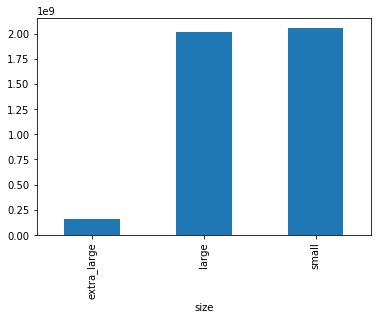

In [31]:
# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby("size")["nb_sold"].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind="bar")

# Show the plot
plt.show()

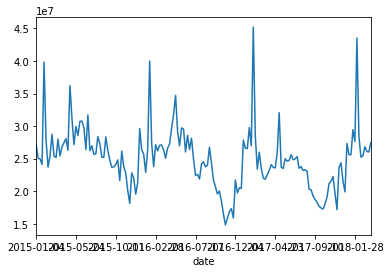

In [32]:
# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby("date")["nb_sold"].sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind="line")

# Show the plot
plt.show()

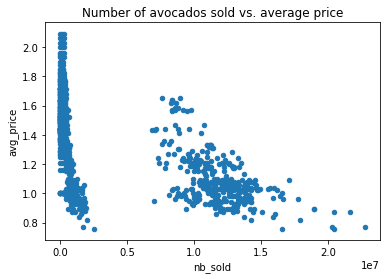

In [33]:
# Scatter plot of nb_sold vs avg_price with title
avocados.plot(x='nb_sold', y='avg_price', kind='scatter', title='Number of avocados sold vs. average price')

# Show the plot
plt.show()

It looks like when more avocados are sold, prices go down. However, this doesn't mean that fewer sales causes higher prices - we can only tell that they're correlated with each other.

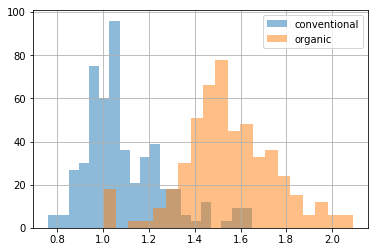

In [34]:
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5, bins=20)

avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5,bins=20)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

We can see that on average, organic avocados are more expensive than conventional ones, but their price distributions have some overlap.

### Finding missing values

In [41]:
# avocados_2016, a subset of avocados that contains only sales from 2016
avocados_2016 = avocados[avocados['year']==2016]

      date   type   year  avg_price   size  nb_sold
52   False  False  False      False  False    False
53   False  False  False      False  False    False
54   False  False  False      False  False    False
55   False  False  False      False  False    False
56   False  False  False      False  False    False
57   False  False  False      False  False    False
58   False  False  False      False  False    False
59   False  False  False      False  False    False
60   False  False  False      False  False    False
61   False  False  False      False  False    False
62   False  False  False      False  False    False
63   False  False  False      False  False    False
64   False  False  False      False  False    False
65   False  False  False      False  False    False
66   False  False  False      False  False    False
67   False  False  False      False  False    False
68   False  False  False      False  False    False
69   False  False  False      False  False    False
70   False  

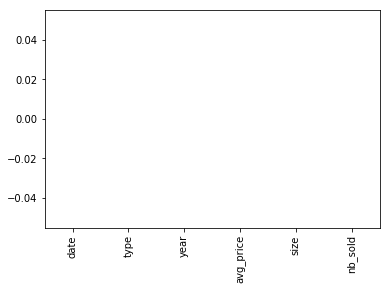

In [42]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Check individual values for missing values
print(avocados_2016.isna())

# Check each column for missing values
print(avocados_2016.isna().any())

# Bar plot of missing values by variable
avocados_2016.isna().sum().plot(kind='bar')

# Show plot
plt.show()

In [43]:
# Remove rows with missing values
avocados_complete = avocados_2016.dropna()

# Check if any columns contain missing values
print(avocados_complete.isna().any())

date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


### crearting dataframe

##### List of dictionaries

In [46]:
# Create a list of dictionaries with new data
avocados_list = [
    {'date': "2019-11-03", 'small_sold': 10376832, 'large_sold': 7835071},
    {'date': "2019-11-10", 'small_sold': 10717154, 'large_sold': 8561348},
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
print(avocados_2019)

         date  large_sold  small_sold
0  2019-11-03     7835071    10376832
1  2019-11-10     8561348    10717154


##### Dictionary of lists

In [48]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17","2019-12-01"],
  "small_sold": [10859987,9291631],
  "large_sold": [7674135,6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-17    10859987     7674135
1  2019-12-01     9291631     6238096
